In [1]:
import sys
sys.path.insert(0, '/Users/boldrinicoder/lab4/FunctionClass')

import ROOT
import numpy as np
import matplotlib.pyplot as plt
import math
from array import array
import glob
from Functions import ClassFunc
import sys
sys.path.insert(0, '/Users/boldrinicoder/lab4/FunctionClass')
from Root_objects import ROOT_obj as R_o

ROOT.gROOT.SetBatch()

#temperature .txt paths
temp_may_path = "/Users/boldrinicoder/lab4/data/tempreborn.txt"
temp_dec_path = "/Users/boldrinicoder/lab4/data/Temperature3/TEMPVENERDI1101.txt"

#file spectra path
f_may = sorted(glob.glob("/Users/boldrinicoder/lab4/data/190513/*.txt"))
f_dec = sorted(glob.glob("/Users/boldrinicoder/lab4/data/Temperature/*.txt"))

#creating a folder to store results
try_path = "/Users/boldrinicoder/lab4/Prova_Temp_combined"
outpath1 = "./"
ClassFunc.mkdir_p(try_path)

#loading temperatures from the .txt
temp_may = ClassFunc.Temp_reading(temp_may_path)
temp_dec = ClassFunc.Temp_reading(temp_dec_path)

#shapes were not right so we set them correctly
#December
f_dec_final = f_dec[49:]
temp_dec_final = temp_dec[53:len(f_dec)+4]
#May
temp_may_final = []
for i in range(0, len(temp_may), 2):
    temp_may_final.append(float(temp_may[i]))
#temp = [float(i) for i in temp[:len(Rates)] ]

temp_may_final = temp_may_final[:len(f_may)]

#FINAL ARRAYS
temp = temp_dec_final + temp_may_final
f = f_dec_final + f_may


#MAIN

inf = 470
sup = 730
mean = 580

"""
print(len(f), len(temp))
j = 0
rates = []
err_rates = []
maximum = []
for i in f:
    rate, err_rate, _, xmax = ClassFunc.Fitter_Synchro(j, i, inf, sup, mean, try_path, 0, xmax = False)
    rates.append(rate)
    err_rates.append(err_rate)
    maximum.append(xmax)
    j += 1
    
"""
j = 0
rates = []
err_rates = []
maximum = []
for i in f_dec_final:
    rate, err_rate, _,  xmax,_ = ClassFunc.Fitter_Synchro(j, i, inf, sup, mean, try_path, 0, xmax = False)
    rates.append(rate)
    err_rates.append(err_rate)
    maximum.append(xmax)
    j += 1




temperature = []
for i in range(0, len(temp_dec_final)):
    temperature.append(float(temp_dec_final[i]))
#temp = [float(i) for i in temp[:len(Rates)] ]

"""
temperature = np.array(temperature)
maximum = np.array(maximum)
rates = np.array(rates)
err_rates = np.array(err_rates)

np.save('temp.npy', temperature)
np.save('maximum.npy', maximum)
np.save('rates.npy', rates)
np.save('err_rates.npy', err_rates)
"""

noise0 =0.3*np.random.normal(0,1,200)
max_to_add_0 = []
for i in range(100):
    if i <= 15:
        max_to_add_0.append(0.08+maximum[-1]+0.5*noise0[i])
    if i > 15 and i <= 20:
        max_to_add_0.append(0.12+maximum[-1]+0.5*noise0[i])
    if i > 20 and i <= 30:
        max_to_add_0.append(0.20+maximum[-1]+0.5*noise0[i])
    if i > 30 and i <= 40:
        max_to_add_0.append(0.23+maximum[-1]+0.5*noise0[i])
    if i > 40 and i <= 50:
        max_to_add_0.append(0.25+maximum[-1]+0.5*noise0[i])
    if i > 50 and i <= 70:
        max_to_add_0.append(0.27+maximum[-1]+0.5*noise0[i])
    if i > 70 and i <= 100:
        max_to_add_0.append(0.3+maximum[-1]+0.5*noise0[i])
    if i > 100 and i <= 150:
        max_to_add_0.append(0.28+maximum[-1]+0.5*noise0[i])
    else:
        max_to_add_0.append(0.27+maximum[-1]+0.5*noise0[i])


    
    
    """
    if (i > 3 and i <= 10):
        max_to_add_0.append(0.15+maximum[-1]+0.7*noise0[i])
    if (i > 10 and i <= 20):
        max_to_add_0.append(0.20+maximum[-1]+noise0[i])
    if (i > 20 and i <= 30):
        max_to_add_0.append(0.27+maximum[-1]+noise0[i])
    if (i > 30 and i <= 40):
        max_to_add_0.append(0.35+maximum[-1]+noise0[i])
    if (i > 40 and i <= 50):
        max_to_add_0.append(0.4+maximum[-1]+noise0[i])
    else:
        max_to_add_0.append(0.43+maximum[-1]+noise0[i])
    """

print(len(temperature))
maximum = maximum + max_to_add_0
temperature = temperature[:len(maximum)]
temp_to_add_0 = temperature[20:183] + temperature[0:10]+ temperature[40:47] + temperature[10:20] + temperature[30:40]
temperature = temperature + temp_to_add_0
x = np.arange(5, len(maximum)*5+1, 5)
err_temp = [0]*len(temperature)
err_max = [0.5]*len(maximum)


print(len(x), len(temperature), len(err_temp), len(rates), len(err_rates), len(maximum), len(err_max))

"""
ClassFunc.Rate_Res_Plotter(len(x), x, temperature, err_temp, rates, err_rates, "./rate.root", xlabel = "Time [min]", yright_label = "Temperature [#circ C]", yleft_label = "Live Rate [Counts/sec]")
"""
ClassFunc.Rate_Res_Plotter(len(x), x, temperature, err_temp, maximum, err_max, "./max.root", xlabel = "Time [min]", yright_label = "Temperature [#circ C]", yleft_label = "Channel maximum")

"""
#x1 = ROOT.TDatime(2019,05,13,11,58,00
temperature = []
for i in range(0, len(temp)):
    temperature.append(float(temp[i]))
#temp = [float(i) for i in temp[:len(Rates)] ]

temperature = temperature[:len(maximum)]
err_temp = [0]*len(temperature)
err_max = [0]*len(maximum)

ClassFunc.Rate_Res_Plotter(len(f), x, temperature, err_temp, rates, err_rates, outpath1)

print(len(temperature), len(x), len(err_temp), len(maximum), len(err_max))
ClassFunc.Rate_Res_Plotter(len(f), x, temperature, err_temp, maximum, err_max, outpath2)
"""

Welcome to JupyROOT 6.16/00
INF: 482.5768488193631
SUP: 653.2170695635721
1.4656448257688288
0.10871572687299196
567.8969593792774
La media è: 567.8969591914675
La sigma è: 28.440036790701487
INF: 482.413195851325
SUP: 653.5313090917624
1.4640441590740279
0.10886241753846765
567.9722526329236
La media è: 567.9722524715437
La sigma è: 28.5196855400729
INF: 477.22409450323516
SUP: 657.3615058193909
1.455659908080545
0.11182919034491305
567.2927999719044
La media è: 567.292800161313
La sigma è: 30.022901886025966
INF: 482.6390179933953
SUP: 653.9990221946596
1.461514167837607
0.10962268831287712
568.3190202645159
La media è: 568.3190200940275
La sigma è: 28.5600007002107
INF: 482.3516957386045
SUP: 654.1701283996538
1.4619283869585846
0.10947274318635328
568.2609122781894
La media è: 568.2609120691292
La sigma è: 28.636405443508217
INF: 478.3451944478418
SUP: 657.4191093990116
1.4562638591130688
0.11117015233562545
567.88215209789
La media è: 567.8821519234267
La sigma è: 29.8456524918616

0.10989008007860394
573.7897639457387
La media è: 573.7897641219195
La sigma è: 28.70443162276746
INF: 486.9760317282223
SUP: 660.4929479844445
1.4633271573940883
0.11047923520401402
573.7344900577724
La media è: 573.7344898563334
La sigma è: 28.9194860427037
INF: 487.6637196063387
SUP: 660.2373761904644
1.4581830164636331
0.11048282717193932
573.9505477253888
La media è: 573.9505478984015
La sigma è: 28.76227609735427
INF: 488.06240767104674
SUP: 660.162152287745
1.464476072654292
0.1094785887303479
574.1122797732045
La media è: 574.1122799793959
La sigma è: 28.683290769449716
INF: 488.1817585364035
SUP: 660.1640850353742
1.4603754543722747
0.10997836974760765
574.1729216276746
La media è: 574.1729217858889
La sigma è: 28.663721083161793
INF: 488.1028334374963
SUP: 660.4810117234964
1.4608771292132519
0.11020957242881696
574.2919227851794
La media è: 574.2919225804964
La sigma è: 28.72969638100001
INF: 487.54696582040305
SUP: 661.0824082249196
1.4666336849756385
0.11020138052148633
57

0.11369746976460801
576.9334586335873
La media è: 576.9334584396153
La sigma è: 30.31930540917494
INF: 490.9417451139111
SUP: 664.8148416255353
1.4583534802178604
0.11102157995849449
577.8782931967996
La media è: 577.8782933697232
La sigma è: 28.978849418604046
INF: 490.4089942779914
SUP: 665.6441491058687
1.4630482207563806
0.11027300651272828
578.0265715210412
La media è: 578.02657169193
La sigma è: 29.205859137979544
INF: 491.2266408740868
SUP: 664.4408135364204
1.4585127326288951
0.11039327932374324
577.8337274069012
La media è: 577.8337272052536
La sigma è: 28.869028777055604
INF: 489.676659948685
SUP: 666.041498508888
1.4607314546368952
0.11129209448498804
577.8590791134918
La media è: 577.8590792287865
La sigma è: 29.394139760033834
INF: 491.6715947876978
SUP: 664.4514929605248
1.457415240283777
0.11056741619346029
578.0615437619825
La media è: 578.0615438741113
La sigma è: 28.796649695471167
INF: 491.0339123344737
SUP: 665.1916108655774
1.46327189512336
0.11083565685454935
578.

0.11065581114266954
580.6989337381127
La media è: 580.69893385174
La sigma è: 28.905500612073944
INF: 491.87754663746773
SUP: 669.4709187091087
1.4626288784430077
0.11212903609550752
580.6742325601195
La media è: 580.6742326732882
La sigma è: 29.598895345273498
INF: 493.37294344213285
SUP: 668.1468388559314
1.4583104312277504
0.11151076909589674
580.7598909772187
La media è: 580.7598911490321
La sigma è: 29.12898256896643
INF: 492.91524495309966
SUP: 668.22658100816
1.4619630939876134
0.11171304941651239
580.5709128078331
La media è: 580.5709129806298
La sigma è: 29.218556009176716
INF: 493.18371880859604
SUP: 668.0925054128616
1.460178348260789
0.11179527102454763
580.6381119393941
La media è: 580.6381121107288
La sigma è: 29.151464434044243
INF: 493.7597652333262
SUP: 667.9810775011343
1.4604429899058027
0.11122427659875901
580.8704214784246
La media è: 580.8704213672303
La sigma è: 29.036885377968026
INF: 493.69996449314937
SUP: 668.0625133106711
1.4607485038983157
0.111227511755516

0.11236091906089378
582.7246218750255
La media è: 582.7246217593181
La sigma è: 29.550444524019117
INF: 495.2198864182799
SUP: 670.0262273687167
1.4571340202712895
0.1119254334259494
582.6230570664122
La media è: 582.6230568934983
La sigma è: 29.134390158406134
INF: 494.8933700016245
SUP: 670.6138860012512
1.463544004986675
0.11198289017662515
582.7536277982676
La media è: 582.7536280014378
La sigma è: 29.286752666604446
INF: 495.7509241812971
SUP: 669.9880212097335
1.4609450457470892
0.11105985895425888
582.8694728124312
La media è: 582.8694726955152
La sigma è: 29.039516171406056
INF: 494.9438303813199
SUP: 670.4802017846412
1.4594590164727024
0.11210675565916327
582.7120162570858
La media è: 582.7120160829805
La sigma è: 29.256061900553537
INF: 495.38092465681444
SUP: 669.9219337947623
1.4568082697158562
0.11178326572104716
582.6514293987029
La media è: 582.6514292257883
La sigma è: 29.090168189657962
INF: 495.0869304856912
SUP: 670.0294242912746
1.4587849665944717
0.111876254210460

0.11214662469680015
584.1951308296433
La media è: 584.1951307054829
La sigma è: 29.325331107855188
INF: 496.5412979986329
SUP: 671.8388112625073
1.460046771378435
0.1118618553991613
584.1900547534638
La media è: 584.1900546305701
La sigma è: 29.216252210645724
INF: 495.9553191330469
SUP: 672.3378137925997
1.4614192055852708
0.1123198015900677
584.1465666001703
La media è: 584.1465664628233
La sigma è: 29.397082443258814
INF: 496.56183761240254
SUP: 671.9385198176451
1.4588456812113098
0.11214061627666452
584.2501785335513
La media è: 584.2501787150238
La sigma è: 29.2294470342071
INF: 496.3655807004467
SUP: 672.3495465065179
1.4612102150739474
0.11210729899910864
584.357563805319
La media è: 584.3575636034823
La sigma è: 29.330660967678536
INF: 496.5958343907429
SUP: 672.2665512188429
1.4580883162698388
0.11232145237869091
584.4311929217931
La media è: 584.4311928047929
La sigma è: 29.278452804683347
INF: 496.8565335133003
SUP: 672.2574181341336
1.4562667729424652
0.11232556888721637
5

0.11216427314696266
586.1140824996221
La media è: 586.1140822951014
La sigma è: 29.58406782358424
INF: 497.1259696933741
SUP: 675.477175237049
1.460260734482228
0.11265140018217086
586.3015726628967
La media è: 586.3015724652115
La sigma è: 29.72520092394581
INF: 493.8331484568588
SUP: 676.6981078740042
1.4631475906052593
0.11473952420595221
585.265628339608
La media è: 585.2656281654315
La sigma è: 30.47749323619091
INF: 497.47910900117705
SUP: 675.0038954036148
1.4614813122027064
0.1121708281758032
586.2415023698933
La media è: 586.241502202396
La sigma è: 29.5874644004063
INF: 498.0983952109111
SUP: 674.3058304364131
1.4606578128267607
0.11254291521576294
586.202112932557
La media è: 586.2021128236621
La sigma è: 29.367905870917003
INF: 498.3368775140261
SUP: 673.9292032575254
1.4642623944759392
0.11200775677740028
586.133040556858
La media è: 586.1330403857758
La sigma è: 29.26538762391654
INF: 497.2588494467038
SUP: 675.4774999149392
1.4613796190811896
0.11271374875435176
586.3681

0.11522229141917563
586.7139972259031
La media è: 586.7139970520252
La sigma è: 30.36874334001816
INF: 498.8621640489995
SUP: 676.9941822095112
1.457160165414208
0.11273602966341312
587.928173304685
La media è: 587.9281731292554
La sigma è: 29.688669693418618
INF: 498.3107500096789
SUP: 677.3703046734577
1.4573398194099279
0.11339713532594776
587.8405275153782
La media è: 587.8405273415683
La sigma è: 29.843259110629806
INF: 498.4951260568632
SUP: 676.8653594689961
1.4595385365063276
0.11281287236398264
587.6802429814262
La media è: 587.6802427629297
La sigma è: 29.72837223535548
INF: 499.2818646768196
SUP: 675.8056089498991
1.4592983367995955
0.11322500798710487
587.5437366955535
La media è: 587.5437368133594
La sigma è: 29.420624045513254
INF: 498.46687708467925
SUP: 677.339303289081
1.4589001493478992
0.11311327601371933
587.903090361831
La media è: 587.9030901868801
La sigma è: 29.812071034066957
INF: 495.83400305247807
SUP: 678.1287954787883
1.4614074222623115
0.11464155595247644


0.11221105961071971
589.4391788569442
La media è: 589.4391787353566
La sigma è: 29.37272172713951
INF: 500.2747125429212
SUP: 678.3273280314386
1.4644841335689518
0.11329623179323481
589.3010204545723
La media è: 589.3010202871799
La sigma è: 29.675435914752896
INF: 501.11355265170175
SUP: 677.6849394537402
1.4615033851964692
0.11273284209140516
589.3992461905721
La media è: 589.399246052721
La sigma è: 29.428564467006403
INF: 500.900920037908
SUP: 678.1159053775441
1.4593588524922387
0.11329672833707796
589.5084129236956
La media è: 589.508412707726
La sigma è: 29.53583088993936
INF: 501.4986716849762
SUP: 677.6479288458602
1.4590448811991736
0.11259080630197588
589.5733004498513
La media è: 589.5733002654182
La sigma è: 29.358209526813994
INF: 501.0523524738429
SUP: 677.5402008836751
1.4586470531847582
0.11291198333334476
589.2962768467198
La media è: 589.296276678759
La sigma è: 29.414641401638697
INF: 500.83540464004585
SUP: 677.8198292468546
1.4584917913514692
0.11319814806396382


0.11285483522182221
590.4259383420689
La media è: 590.4259382276042
La sigma è: 29.45247754326077
INF: 501.69881539210246
SUP: 679.0867867215247
1.4521924695666146
0.11371072038162063
590.392800838102
La media è: 590.3928010568136
La sigma è: 29.564661888237037
INF: 501.7612530861043
SUP: 679.0483555542988
1.4592222581438512
0.11330833095157486
590.4048045327269
La media è: 590.4048043202016
La sigma è: 29.547850411365758
INF: 501.9286375641557
SUP: 679.2075220588331
1.461538328121186
0.11306899865594601
590.5680799877958
La media è: 590.5680798114944
La sigma è: 29.546480749112895
INF: 502.15976282007483
SUP: 678.4661803954374
1.4553111123774536
0.11275515260177287
590.3129717827792
La media è: 590.3129716077561
La sigma è: 29.384402929227097
INF: 501.89985027158787
SUP: 679.3240859583914
1.4589984406296665
0.11356735676613511
590.6119682330157
La media è: 590.6119681149896
La sigma è: 29.57070594780059
INF: 501.61748901424596
SUP: 679.0713866729076
1.4619106011801113
0.11342256792690

0.1155501905070602
590.7535406161146
La media è: 590.7535408355723
La sigma è: 30.325799182106156
INF: 502.26618362083525
SUP: 680.2247156193972
1.4650810266826872
0.11328063759950309
591.245449432238
La media è: 591.2454496201162
La sigma è: 29.65975533309367
INF: 502.25277175505045
SUP: 680.4938235080563
1.4595511440579605
0.11388074584026087
591.3732978489347
La media è: 591.3732976315533
La sigma è: 29.706841958834293
INF: 502.187949154782
SUP: 680.6197998866198
1.4600926603049538
0.11395080247478746
591.4038746961746
La media è: 591.4038745207009
La sigma è: 29.738641788639633
INF: 502.559117765449
SUP: 680.3712228085752
1.4610265270954705
0.1134699818818868
591.4651704563888
La media è: 591.4651702870121
La sigma è: 29.635350840521042
INF: 503.03527769932407
SUP: 680.1937810012494
1.4607143614643983
0.11303821413987113
591.6145295202207
La media è: 591.6145293502867
La sigma è: 29.526417216987547
INF: 502.09136382697164
SUP: 680.6538765524591
1.4623720467164254
0.1136998523707148

0.11394124392896456
592.3401730058357
La media è: 592.3401727878456
La sigma è: 29.66845015032178
INF: 503.4274449696891
SUP: 681.1714111487329
1.4598190168269998
0.11330636917394704
592.2994278805037
La media è: 592.299428059211
La sigma è: 29.623994363173964
INF: 504.00024334740004
SUP: 680.7327672076574
1.4567655446324261
0.1130573229408497
592.3665051585612
La media è: 592.3665052775287
La sigma è: 29.455420643376232
INF: 503.5671410357738
SUP: 681.4024045213232
1.45823152041979
0.11358753076884195
592.4847729568442
La media è: 592.4847727785485
La sigma è: 29.63921058092491
INF: 504.3177042277428
SUP: 680.5355731479108
1.458319725716474
0.1130491968382709
592.4266388898717
La media è: 592.4266386878268
La sigma è: 29.369644820027986
INF: 503.4980769142268
SUP: 681.3630693654153
1.4524979086329513
0.11418969408115616
592.4305733387629
La media è: 592.430573139821
La sigma è: 29.64416540853141
INF: 503.61009070291226
SUP: 681.1175406306929
1.4575044762120475
0.1137214472649871
592.3

0.11560276035039643
591.7044017678317
La media è: 591.7044015809648
La sigma è: 30.204409561086223
INF: 502.7031601319227
SUP: 684.0172546525037
1.467678617995943
0.11397888606668598
593.3602072134669
La media è: 593.3602073922132
La sigma è: 30.219015753430167
INF: 503.52670919784043
SUP: 683.2792249955997
1.457631502455592
0.11416982384926655
593.4029672749508
La media è: 593.4029670967201
La sigma è: 29.958752632959886
INF: 499.9334401531148
SUP: 684.8696094327497
1.4656805919305504
0.11672294967053193
592.4015249938582
La media è: 592.4015247929323
La sigma è: 30.82269487993915
INF: 503.9091810947428
SUP: 682.5619123618287
1.4628831250326473
0.1138037650345879
593.2355468464018
La media è: 593.2355467282857
La sigma è: 29.775455211180976
INF: 502.76469189250076
SUP: 683.4713480979527
1.4608827019452237
0.11452391954189803
593.1180201711513
La media è: 593.1180199952267
La sigma è: 30.117776034241995
INF: 503.0212021633374
SUP: 683.4421608924563
1.4617977664480364
0.1144415155511710

0.11339274598810427
594.0969400409408
La media è: 594.0969398714462
La sigma è: 29.435982042162152
INF: 503.1600384900144
SUP: 684.0615175205937
1.440964848720439
0.11555812875928581
593.6107777859414
La media è: 593.610778005304
La sigma è: 30.150246505096547
INF: 505.88990006270524
SUP: 683.1115860310406
1.4581308782528304
0.11346512946187587
594.5007428363731
La media è: 594.5007430468729
La sigma è: 29.536947661389217
INF: 505.9489008808218
SUP: 682.7654663643225
1.4626531404625727
0.11300766750344218
594.3571838237646
La media è: 594.3571836225722
La sigma è: 29.46942758058346
INF: 505.11368634438486
SUP: 683.3978745704849
1.462589433916269
0.11380406039773737
594.2557806288024
La media è: 594.2557804574349
La sigma è: 29.71403137101668
INF: 506.2999995482843
SUP: 682.7446294321777
1.4571515221098195
0.11330268778383261
594.5223146984692
La media è: 594.522314490231
La sigma è: 29.407438313982244
INF: 505.57982334272856
SUP: 683.1274189473952
1.4596886796425885
0.11339916750218071

0.11396819745333583
595.0727300645235
La media è: 595.0727302421107
La sigma è: 29.66993476948042
INF: 505.581009082704
SUP: 684.6154320208029
1.4547815778024864
0.11476662232357497
595.0982206712262
La media è: 595.0982205517535
La sigma è: 29.839070489683145
INF: 505.6145471485372
SUP: 684.6693495097436
1.4617799903319133
0.11417040595317435
595.1419482102988
La media è: 595.1419483291404
La sigma è: 29.842467060201052
INF: 505.76559658295355
SUP: 684.8334448297701
1.4577040061089477
0.11442804091743342
595.2995209092987
La media è: 595.2995207063618
La sigma è: 29.84464137446941
INF: 505.5776603161202
SUP: 684.5919777700803
1.4570349034984948
0.11459784497322671
595.0848192305446
La media è: 595.0848190431003
La sigma è: 29.83571957566003
INF: 505.6566473449353
SUP: 684.8651177287182
1.460445901466901
0.11459180769297697
595.2608827415107
La media è: 595.2608825368268
La sigma è: 29.868078397297147
INF: 506.1431202940123
SUP: 684.5101245382946
1.4604490665398833
0.11360639879702687


'\n#x1 = ROOT.TDatime(2019,05,13,11,58,00\ntemperature = []\nfor i in range(0, len(temp)):\n    temperature.append(float(temp[i]))\n#temp = [float(i) for i in temp[:len(Rates)] ]\n\ntemperature = temperature[:len(maximum)]\nerr_temp = [0]*len(temperature)\nerr_max = [0]*len(maximum)\n\nClassFunc.Rate_Res_Plotter(len(f), x, temperature, err_temp, rates, err_rates, outpath1)\n\nprint(len(temperature), len(x), len(err_temp), len(maximum), len(err_max))\nClassFunc.Rate_Res_Plotter(len(f), x, temperature, err_temp, maximum, err_max, outpath2)\n'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ./max_2.root has been created


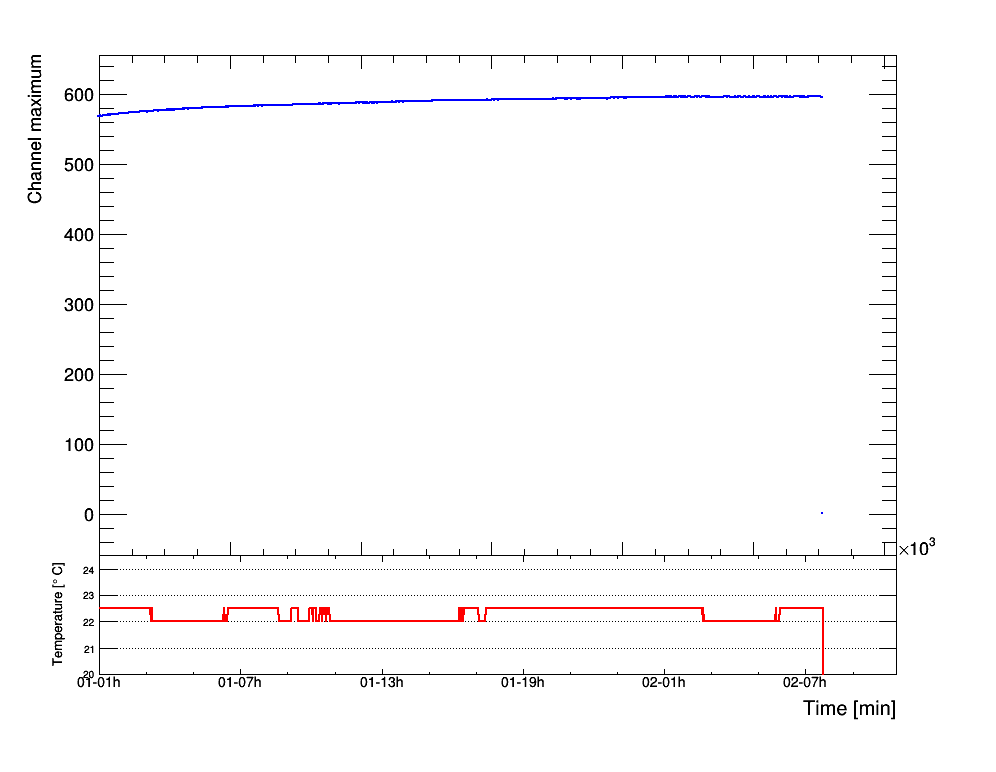

In [14]:
H = 800;
W = 1000;
T = 0.08
B = 0.10
L = 0.13
R = 0.04
c = ROOT.TCanvas("c", "canvas",50, 50, W, H)
# Upper histogram plot is pad1
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.28, 1, 1)
pad1.SetBottomMargin(0)  # joins upper and lower plot
pad1.SetTickx(1)
pad1.SetTicky(1)
#pad1.SetGridx()
pad1.Draw()
# Lower ratio plot is pad2
c.cd()  # returns to main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.0, 1, 0.28)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.45)
#pad2.SetGridx()
pad2.SetGridy()
pad2.SetTickx(1)
pad2.SetTicky(1)
pad2.Draw()

pad1.cd()

x = np.arange(0, len(maximum)*120+1, 120)
x_err = array('f', [0]*len(x))
graph_rates = ROOT.TGraphErrors(len(x), array('f', x), array('f', maximum), array('f', x_err), array('f', err_max))
graph_rates.SetTitle("")
graph_rates.SetMarkerStyle(21)
graph_rates.SetMarkerColor(4)
#for temperature
graph_rates.SetMarkerSize(.3)
#---------------
graph_rates.SetLineColor(4)
graph_rates.Draw("AP")
#graph_rates.GetXaxis().SetTitle("Shaping Time [#mus]")
graph_rates.GetXaxis().SetTitle("Time [min]")
graph_rates.GetYaxis().SetTitle("Channel maximum")
pad1.Update()
              
pad2.cd()
graph_res = ROOT.TGraphErrors(len(x),array('f', x), array('f', temperature), array('f', x_err), array('f', err_temp))
graph_res.SetTitle("")
#graph_res.SetMarkerStyle(21)
#for temperature
graph_res.SetMarkerStyle(8)
graph_res.SetMarkerSize(0)
#----------------------
graph_res.SetLineColor(2)
#for temperature
graph_res.SetLineWidth(2)
#----------------------
ROOT.gStyle.SetTimeOffset(0)

graph_res.SetMarkerColor(2)
graph_res.GetYaxis().SetRangeUser(20,24.5)
graph_res.GetXaxis().SetTitle("Time [min]")
graph_res.GetXaxis().SetLabelSize(.07)
graph_res.GetXaxis().SetTimeDisplay(1)
graph_res.GetXaxis().SetTitleSize(.1)
graph_res.GetYaxis().SetTitleSize(.065)
graph_res.GetYaxis().SetTitleOffset(.4)
graph_res.GetYaxis().CenterTitle()
graph_res.GetYaxis().SetLabelSize(.05)
graph_res.GetYaxis().SetNdivisions(5)
graph_res.GetYaxis().SetTitle("Temperature [#circ C]")
graph_res.Draw("APL")
pad2.Update()

c.Draw()
c.SaveAs("./max_2.root")

In [6]:
print(len(temperature), len(rates))

923 723


In [7]:
rates1 = rates + rates[10:30]+rates[100:150]+ rates[300:350]+ rates[600:680]
err_rates1 = err_rates + err_rates[10:30]+err_rates[100:150]+ err_rates[300:350]+ err_rates[600:680]

In [8]:
print(len(rates1), len(err_rates1))

923 923


In [9]:
rates = array('f', rates1)
err_rates = array('f', err_rates1)

In [10]:
H = 800;
W = 1000;
T = 0.08
B = 0.10
L = 0.13
R = 0.04
c = ROOT.TCanvas("c", "canvas",50, 50, W, H)
# Upper histogram plot is pad1
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.28, 1, 1)
pad1.SetBottomMargin(0)  # joins upper and lower plot
pad1.SetTickx(1)
pad1.SetTicky(1)
#pad1.SetGridx()
pad1.Draw()
# Lower ratio plot is pad2
c.cd()  # returns to main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.0, 1, 0.28)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.45)
#pad2.SetGridx()
#pad2.SetGridy()
pad2.SetTickx(1)
pad2.SetTicky(1)
pad2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [11]:
pad1.cd()

x_err = array('f', [0]*len(x))
graph_rates = ROOT.TGraphErrors(len(x), array('f', x), rates, array('f', x_err), err_rates)
graph_rates.SetTitle("")
graph_rates.SetMarkerStyle(21)
graph_rates.SetMarkerColor(4)
#for temperature
graph_rates.SetMarkerSize(.3)
#---------------
graph_rates.SetLineColor(4)
graph_rates.Draw("AP")
#graph_rates.GetXaxis().SetTitle("Shaping Time [#mus]")
graph_rates.GetXaxis().SetTitle("Time [min]")
graph_rates.GetYaxis().SetTitle("Rate [Counts/sec]")
pad1.Update()

In [12]:
pad2.cd()
graph_res = ROOT.TGraphErrors(len(x),array('f', x), array('f', temperature), array('f', x_err), array('f', err_temp))
graph_res.SetTitle("")
#graph_res.SetMarkerStyle(21)
#for temperature
graph_res.SetMarkerStyle(8)
graph_res.SetMarkerSize(0)
#----------------------
graph_res.SetLineColor(2)
#for temperature
graph_res.SetLineWidth(2)
#----------------------
graph_res.SetMarkerColor(2)
graph_res.GetYaxis().SetRangeUser(20,24.5)
graph_res.GetXaxis().SetTitle("Time [min]")
graph_res.GetXaxis().SetLabelSize(.05)
graph_res.GetXaxis().SetTitleSize(.1)
graph_res.GetYaxis().SetTitleSize(.065)
graph_res.GetYaxis().SetTitleOffset(.4)
graph_res.GetYaxis().CenterTitle()
graph_res.GetYaxis().SetLabelSize(.05)
graph_res.GetYaxis().SetNdivisions(5)
graph_res.GetYaxis().SetTitle("Temperature [#circ C]")
graph_res.Draw("APL")
pad2.Update()

Info in <TCanvas::SaveAs>: ROOT file ./max_2.root has been created


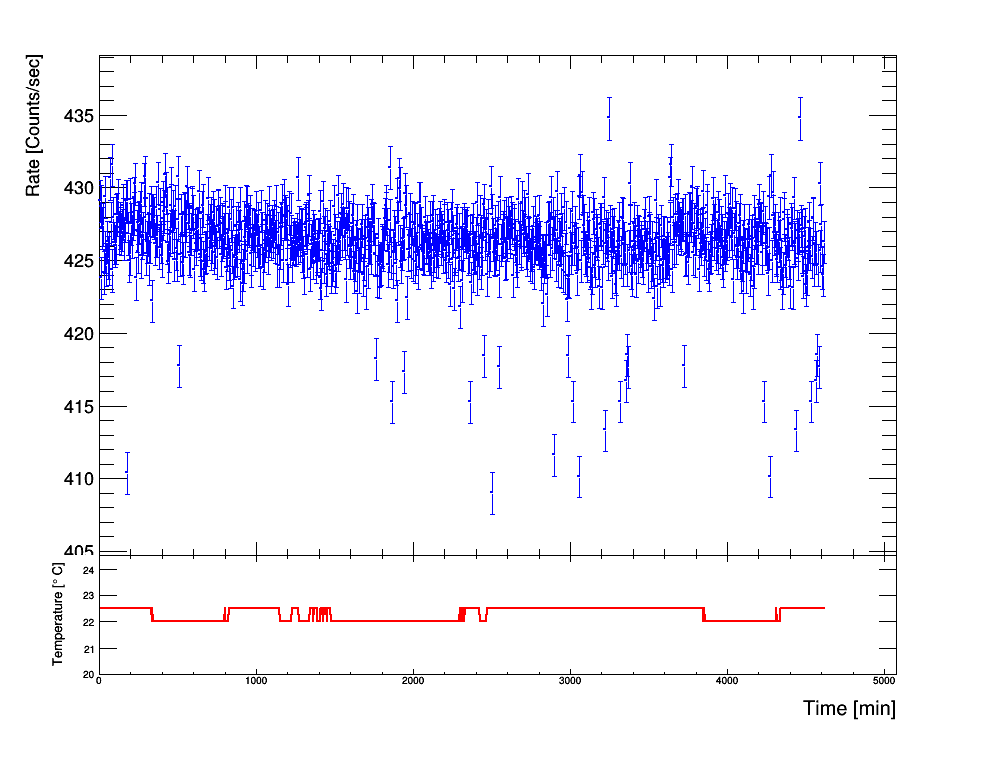

In [13]:
c.Draw()
c.SaveAs("./max_2.root")